In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, classification_report



In [2]:
# Load dataset
df = pd.read_csv("cleaned_dataset.csv")

# Convert date columns to datetime
date_cols = ['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col])


# Statistical Analysis

In [3]:
# General summary
print(df.describe())

       order_item_id         price  freight_value  product_name_lenght  \
count        39352.0  39352.000000   39352.000000         39352.000000   
mean             1.0     58.974995      14.324378            48.781155   
min              1.0      0.850000       3.000000            22.000000   
25%              1.0     29.900000      11.740000            42.000000   
50%              1.0     49.900000      14.730000            51.000000   
75%              1.0     79.900000      17.130000            57.000000   
max              1.0    171.000000      26.370000            76.000000   
std              0.0     37.299817       4.296886             9.668476   

       product_description_lenght  product_photos_qty  product_weight_g  \
count                39352.000000        39352.000000      39352.000000   
mean                   604.454005            2.092219        568.027419   
min                     15.000000            1.000000          0.000000   
25%                    335.000000

Average delivery time: 10.098297371919418


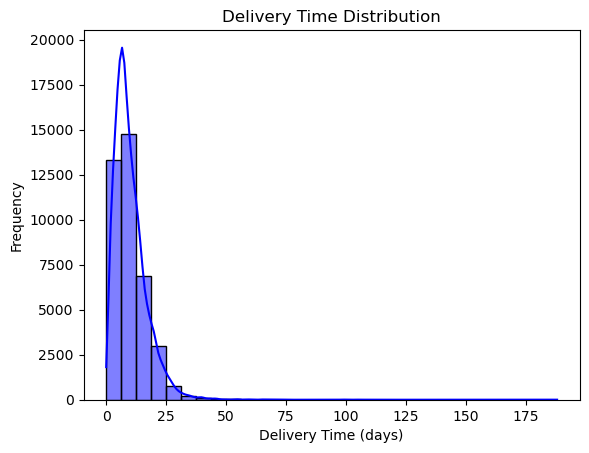

In [4]:
# Delivery Time Analysis
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
print("Average delivery time:", df['delivery_time'].mean())

# Plot delivery time distribution
sns.histplot(df['delivery_time'], kde=True, bins=30, color="blue")
plt.title("Delivery Time Distribution")
plt.xlabel("Delivery Time (days)")
plt.ylabel("Frequency")
plt.show()


C:\Users\ahmed\AppData\Local\Temp\ipykernel_21944\1402435110.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='review_score', palette="viridis")


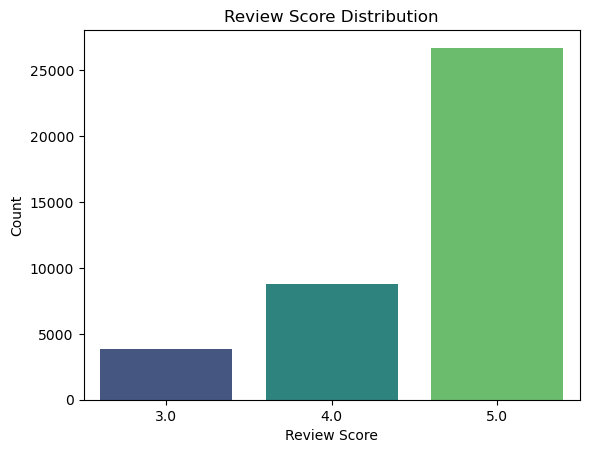

product_category_name_english
home_comfort_2               5.000000
furniture_bedroom            5.000000
fashion_childrens_clothes    5.000000
books_imported               4.914286
books_technical              4.788732
books_general_interest       4.780269
music                        4.764706
costruction_tools_garden     4.755102
art                          4.731707
arts_and_craftmanship        4.727273
Name: review_score, dtype: float64


In [5]:
# Review Score Analysis
# Review score distribution
sns.countplot(data=df, x='review_score', palette="viridis")
plt.title("Review Score Distribution")
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.show()

# Mean review score by product category
mean_reviews = df.groupby('product_category_name_english')['review_score'].mean().sort_values(ascending=False)
print(mean_reviews.head(10))


# Predictive Analysis

In [6]:
# Delivery Time Prediction
# Features and Target
features = df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']]
target = df['delivery_time'].fillna(df['delivery_time'].mean())  # Handle missing values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print("RMSE for Delivery Time Prediction:", np.sqrt(mean_squared_error(y_test, y_pred)))


RMSE for Delivery Time Prediction: 7.473683169903639


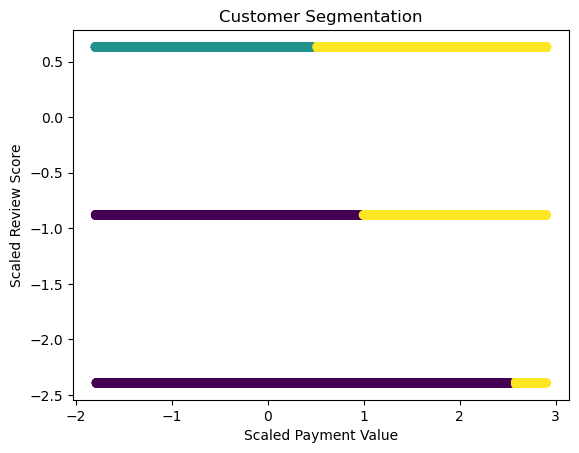

In [7]:
# Customer Segmentation
# Select Features
segmentation_features = df[['payment_value', 'review_score']].dropna()

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(segmentation_features)

# Apply Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['customer_segment'] = kmeans.fit_predict(scaled_features)

# Visualize Clusters
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=df['customer_segment'], cmap='viridis')
plt.title("Customer Segmentation")
plt.xlabel("Scaled Payment Value")
plt.ylabel("Scaled Review Score")
plt.show()


In [8]:
# Canceled Order Prediction
# Features and Target
df['is_canceled'] = df['order_status'].apply(lambda x: 1 if x == 'canceled' else 0)
features = pd.get_dummies(df[['payment_value', 'freight_value', 'product_photos_qty']], drop_first=True)
target = df['is_canceled']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train Model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7865
           1       0.00      0.00      0.00         6

    accuracy                           1.00      7871
   macro avg       0.50      0.50      0.50      7871
weighted avg       1.00      1.00      1.00      7871



In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,roc_curve

# Sales Prediction

In [13]:

# Sales Prediction
# Features: 'price', 'freight_value', 'payment_value'; Target: 'sales'

def preprocess_sales(df):
    df['sales'] = df['price'] * df['payment_value']  # Example formula for sales
    features = df[['price', 'freight_value', 'payment_value']].fillna(0)
    target = df['sales']
    return features, target

# Order Cancellation Prediction
# Feature: 'order_status', Target: Binary Cancellation Status

def preprocess_cancellation(df):
    df['is_canceled'] = df['order_status'].apply(lambda x: 1 if x == 'canceled' else 0)
    features = df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']]
    target = df['is_canceled']
    features = features.fillna(features.median())
    return features, target

# Standardization Function
def standardize_data(features):
    scaler = StandardScaler()
    return scaler.fit_transform(features)


### Sales Prediction ###
Linear Regression Results:
R² Score: 0.93
RMSE: 1707.59
MAE: 1324.18


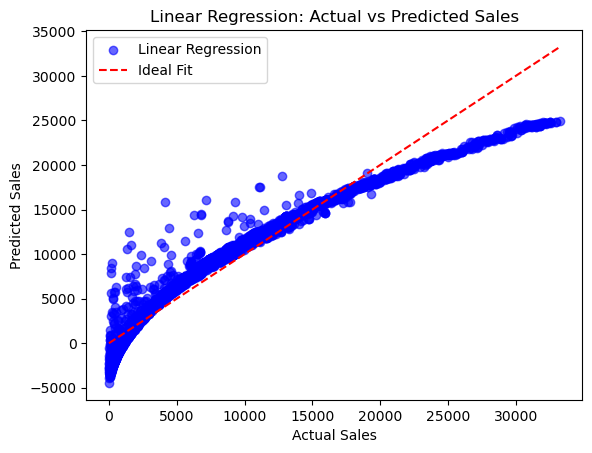

In [14]:
# Sales Prediction
print("\n### Sales Prediction ###")
features_sales, target_sales = preprocess_sales(df)
features_sales = standardize_data(features_sales)

X_train, X_test, Y_train, Y_test = train_test_split(features_sales, target_sales, test_size=0.2, random_state=42)

# Linear Regression for Sales Prediction
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
y_pred = linear_model.predict(X_test)

# Metrics
r2 = r2_score(Y_test, y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
mae = mean_absolute_error(Y_test, y_pred)

print("Linear Regression Results:")
print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Visualization
plt.scatter(Y_test, y_pred, alpha=0.6, color='blue', label='Linear Regression')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression: Actual vs Predicted Sales')
plt.legend()
plt.show()

# Order Cancellation Prediction


### Order Cancellation Prediction ###
SVM Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7865
           1       0.00      0.00      0.00         6

    accuracy                           1.00      7871
   macro avg       0.50      0.50      0.50      7871
weighted avg       1.00      1.00      1.00      7871



c:\Users\ahmed\.conda\envs\Depressio\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ahmed\.conda\envs\Depressio\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ahmed\.conda\envs\Depressio\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


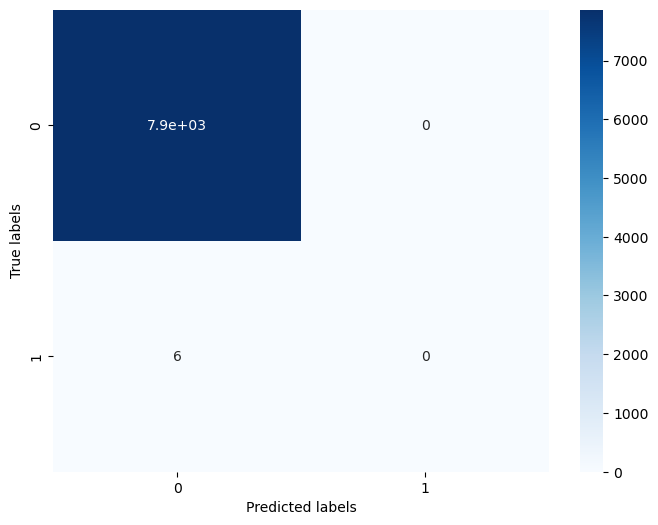

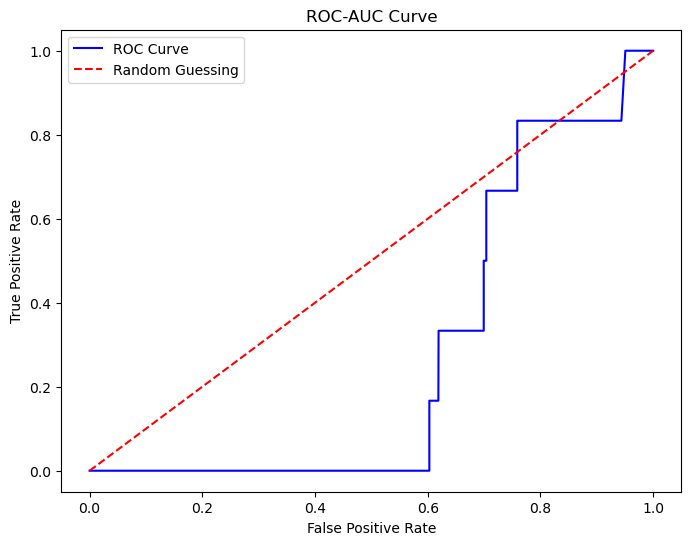

In [15]:
# Order Cancellation Prediction
print("\n### Order Cancellation Prediction ###")
features_cancellation, target_cancellation = preprocess_cancellation(df)
features_cancellation = standardize_data(features_cancellation)

X_train, X_test, Y_train, Y_test = train_test_split(features_cancellation, target_cancellation, test_size=0.2, random_state=42)

# Support Vector Machine for Order Cancellation
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, Y_train)
y_pred = svm_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(Y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(Y_test, y_pred))

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

# ROC-AUC Curve
y_pred_proba = svm_model.decision_function(X_test)
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()


### Sales Prediction ###
Linear Regression Results:
R² Score: 0.93
RMSE: 1707.59
MAE: 1324.18

Random Forest Results:
R² Score: 1.00
RMSE: 69.78
MAE: 11.36


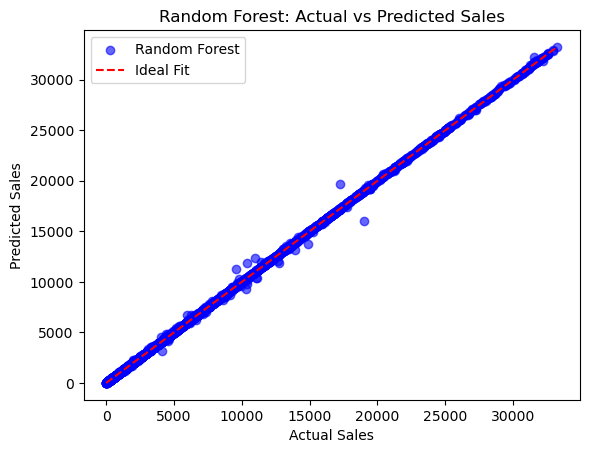

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Sales Prediction Preprocessing Function
def preprocess_sales(df):
    df['sales'] = df['price'] * df['payment_value']  # Example formula for sales
    features = df[['price', 'freight_value', 'payment_value']].fillna(0)
    target = df['sales']
    return features, target

# \oad dataset
df = pd.read_csv("cleaned_dataset.csv")

# Preprocess Sales Data
features_sales, target_sales = preprocess_sales(df)

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(features_sales, target_sales, test_size=0.2, random_state=42)

# Train Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
y_pred_linear = linear_model.predict(X_test)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, Y_train)
y_pred_rf = rf_model.predict(X_test)

# Metrics for Linear Regression
r2_linear = r2_score(Y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(Y_test, y_pred_linear))
mae_linear = mean_absolute_error(Y_test, y_pred_linear)

# Metrics for Random Forest
r2_rf = r2_score(Y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(Y_test, y_pred_rf))
mae_rf = mean_absolute_error(Y_test, y_pred_rf)

# Results
print("\n### Sales Prediction ###")
print("Linear Regression Results:")
print(f"R² Score: {r2_linear:.2f}")
print(f"RMSE: {rmse_linear:.2f}")
print(f"MAE: {mae_linear:.2f}")

print("\nRandom Forest Results:")
print(f"R² Score: {r2_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")

# Visualization: Actual vs Predicted Sales
plt.scatter(Y_test, y_pred_rf, alpha=0.6, color='blue', label='Random Forest')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Random Forest: Actual vs Predicted Sales')
plt.legend()
plt.show()



# Order Cancellation

Random Forest Training Time: 3.97 seconds

Optimized Random Forest Results:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      7874
           1       0.86      0.99      0.93      7853

    accuracy                           0.92     15727
   macro avg       0.93      0.92      0.92     15727
weighted avg       0.93      0.92      0.92     15727



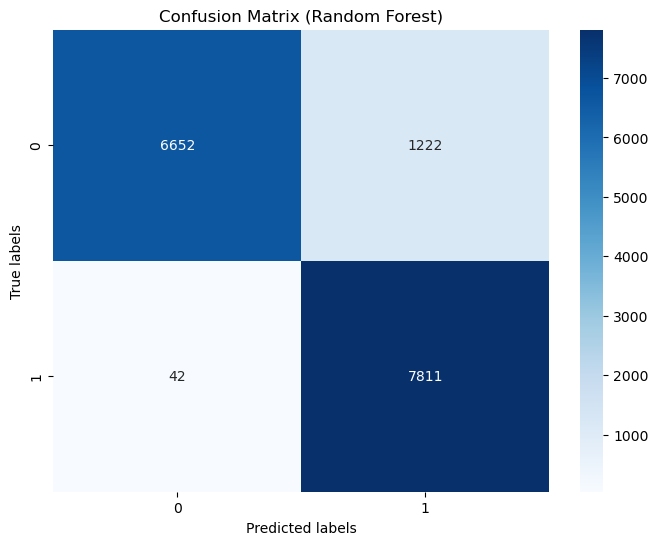

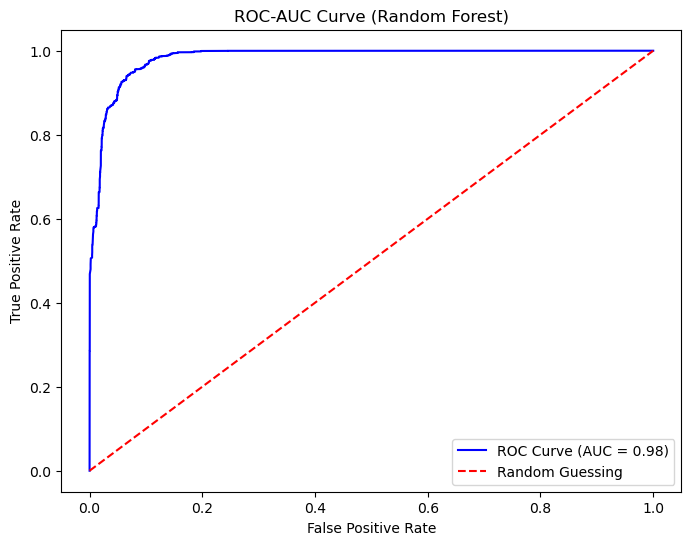

Linear SVM Training Time: 0.10 seconds

Optimized SVM Results:
Accuracy: 0.50
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7874
           1       0.50      1.00      0.67      7853

    accuracy                           0.50     15727
   macro avg       0.25      0.50      0.33     15727
weighted avg       0.25      0.50      0.33     15727



c:\Users\ahmed\.conda\envs\Depressio\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ahmed\.conda\envs\Depressio\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ahmed\.conda\envs\Depressio\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


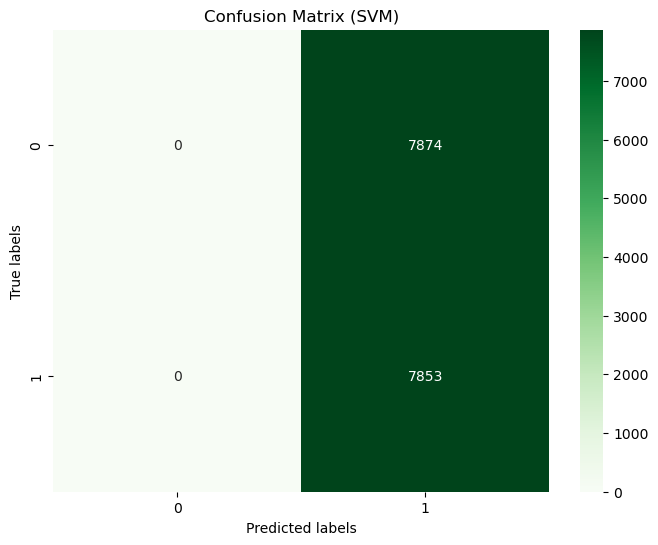

In [2]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

# Order Cancellation Preprocessing Function
def preprocess_cancellation(df):
    df['is_canceled'] = df['order_status'].apply(lambda x: 1 if x == 'canceled' else 0)
    features = df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']]
    target = df['is_canceled']
    features = features.fillna(features.median())
    return features, target

# Load and preprocess data
df = pd.read_csv("cleaned_dataset.csv")
features_cancellation, target_cancellation = preprocess_cancellation(df)

# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(features_cancellation, target_cancellation)

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Optimized Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=50,       # Reduced number of trees
    max_depth=10,          # Limit tree depth
    class_weight="balanced",
    random_state=42,
    n_jobs=-1              # Enable parallel processing
)

# Train and Time the Random Forest Model
start_time = time.time()
rf_model.fit(X_train, Y_train)
end_time = time.time()
print(f"Random Forest Training Time: {end_time - start_time:.2f} seconds")

# Evaluate Random Forest Model
y_pred_rf = rf_model.predict(X_test)
print("\nOptimized Random Forest Results:")
print(f"Accuracy: {accuracy_score(Y_test, y_pred_rf):.2f}")
print("Classification Report:")
print(classification_report(Y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, y_pred_rf), annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

# ROC-AUC Curve
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve (Random Forest)')
plt.legend()
plt.show()

# Optimized Linear SVM Model
svm_model = LinearSVC(class_weight={0: 1, 1: 50}, max_iter=1000)

# Train and Time the SVM Model
start_time = time.time()
svm_model.fit(X_train, Y_train)
end_time = time.time()
print(f"Linear SVM Training Time: {end_time - start_time:.2f} seconds")

# Evaluate SVM Model
y_pred_svm = svm_model.predict(X_test)
print("\nOptimized SVM Results:")
print(f"Accuracy: {accuracy_score(Y_test, y_pred_svm):.2f}")
print("Classification Report:")
print(classification_report(Y_test, y_pred_svm))

# Confusion Matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, y_pred_svm), annot=True, cmap='Greens', fmt='d')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix (SVM)")
plt.show()


c:\Users\ahmed\.conda\envs\Depressio\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Non-linear SVM Training Time (Subset): 2.73 seconds

Optimized SVM Results (RBF Kernel):
Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.64      0.60      7874
           1       0.59      0.51      0.54      7853

    accuracy                           0.57     15727
   macro avg       0.58      0.57      0.57     15727
weighted avg       0.58      0.57      0.57     15727



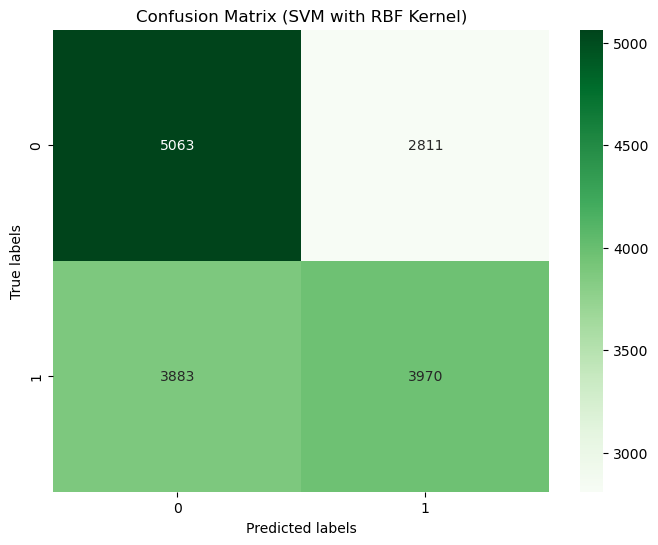

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Use a subset of the data for faster training
X_train_small, _, Y_train_small, _ = train_test_split(X_train, Y_train, test_size=0.8, random_state=42)

# Train Non-linear SVM with Limited Iterations
svm_model = SVC(kernel='rbf', C=10, class_weight={0: 1, 1: 50}, max_iter=500)
start_time = time.time()
svm_model.fit(X_train_small, Y_train_small)
end_time = time.time()
print(f"Non-linear SVM Training Time (Subset): {end_time - start_time:.2f} seconds")

# Evaluate the SVM Model
y_pred_svm = svm_model.predict(X_test)
print("\nOptimized SVM Results (RBF Kernel):")
print(f"Accuracy: {accuracy_score(Y_test, y_pred_svm):.2f}")
print("Classification Report:")
print(classification_report(Y_test, y_pred_svm))

# Confusion Matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, y_pred_svm), annot=True, cmap='Greens', fmt='d')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix (SVM with RBF Kernel)")
plt.show()
